This script will compile and organize the data of every patient in a more understable way

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib
import scipy.io as sio
import mne 
import os
from sklearn.metrics import roc_curve, auc
from functions.preprocessing import *
from scipy.stats import kruskal
from sklearn.metrics import pairwise_distances

## Main AUC file generation

In [75]:
# patients = [
# 'sub-HUP139',
# 'sub-HUP180',
# 'sub-HUP146',
# 'sub-HUP177',
# 'sub-HUP185',
# 'sub-HUP117',
# 'sub-HUP173',
# 'sub-HUP160',
# 'sub-HUP148',
# 'sub-HUP150',
# 'sub-HUP130',
# 'sub-HUP141',
# 'sub-HUP144',
# 'sub-HUP164',
# 'sub-HUP142',
# 'sub-HUP172',
# 'sub-HUP151',
# 'sub-HUP171',
# 'sub-HUP187',
# ]  #Patients to process
patients=['S1','S2','S3','S4','S5']
percentiles=[0.9,0.95,0.99]
ref_data='x1'
bands = ['alpha','beta','theta','full_gamma','low_gamma','high_gamma1']
method_exp = 'plv'
norm = ['','distance_']
experiment=''


# output_path="/home/pablo/works/dev_thesis_SEEG/outputs_t03/"
# main_path='/home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/'
main_path='/home/pablo/works/dev_thesis_SEEG/data/TVB_patients'
output_path="/home/pablo/works/dev_thesis_SEEG/outputs_simil_t3/"




# # Define a MultiIndex for patients, percentiles, and norm
# index = pd.MultiIndex.from_product(
#     [patients, percentiles, norm],
#     names=["Patient", "Percentile", "Normalization"]
# )
# columns = bands
# results_df = pd.DataFrame(index=index, columns=columns)

# # Process each patient
# for patient in patients:
#     # doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
#     # raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
#     # xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
#     # events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
#     # channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
#     # raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)

#     # #Define input paths
#     main_path='/home/pablo/works/dev_thesis_SEEG/data/TVB_patients'
#     # Document with file data
#     raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)
#     xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'xyz_loc.csv',sep=',')
#     raw, xyz_loc, inside_network= format_data(raw, xyz_loc, events=None, channels=None)

#     # #save the xyz_loc
#     # xyz_loc.to_csv(output_path + 'xyz_loc.csv', sep='\t', index=False)

#     # Process each band, percentile, and normalization type
#     for percentile in percentiles:
#         for n in norm:
#             for band in bands:
#                 try:
#                     # Load density probabilities
#                     probs_path = (
#                         f"{output_path}/{patient}{experiment}/ref_{ref_data}/percentile_{percentile}/"
#                         f"normalized_densities_{band}_{n}_{method_exp}.csv"
#                     )
#                     probs = pd.read_csv(probs_path)

#                     # Prepare for AUC calculation
#                     normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
#                     y_true = np.array([1 if contact in inside_network else 0 for contact in normalized_densities.keys()])
#                     y_scores = np.array([score for score in normalized_densities.values()])
                    

#                      # Step 4: Calculate ROC curve and AUC
#                     fpr, tpr, thresholds = roc_curve(y_true, y_scores)
#                     auc_score = auc(fpr, tpr)
                
#                     # Store the AUC score
#                     results_df.loc[(patient, percentile, n), band] = auc_score
#                 except Exception as e:
#                     print()
#                     print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
#                     results_df.loc[(patient, percentile, n), band] = None

# # Save results to CSV
# # results_df.to_csv(f"{output_path}/auc_scores_summary_{method_exp}_t03.csv")
# # print("AUC scores saved to", f"{output_path}/{method_exp}_scores_summary.csv")


# # Display DataFrame
# # print(results_df)

axises=['r', 'a', 's']
index = pd.MultiIndex.from_product(
    [patients, percentiles, norm],
    names=["Patient", "Percentile", "Normalization"]
)
columns = bands
results_df = pd.DataFrame(index=index, columns=columns)
T=0.5

# Process each patient
for patient in patients:
    # REAL DATA
    # doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
    # raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
    # xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
    # events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
    # channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
    # raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)



    # SIMULATED DATA
    raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)
    xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'xyz_loc.csv',sep=',')
    raw, xyz_loc, inside_network= format_data(raw, xyz_loc, events=None, channels=None)

    #save the xyz_loc
    # xyz_loc.to_csv(output_path + 'xyz_loc.csv', sep='\t', index=False)

    # Process each band, percentile, and normalization type
    for percentile in percentiles:
        for n in norm:
            for band in bands:
                try:
                    # Load density probabilities
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}_{method_exp}.csv"
                    )
                    probs = pd.read_csv(probs_path)

                    # Prepare for AUC calculation
                    normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                    # Get the electrodes wich normalized density is greater than T
                    normalized_densities_ = {k:v for k,v in normalized_densities.items() if v>T}
                    pred=list(normalized_densities_.keys())

                    # Get the distance matrix  #Get the euclidean distance between each pair of electrodes
                    distances = pairwise_distances(xyz_loc[axises])
                    # Normalize the distances
                    normalized_distances = normalize_matrix(distances)

                    #Indexes
                    index_pred=list(xyz_loc.where(xyz_loc['formatted_label'].isin(pred)).dropna().index)
                    index_inside_network = list(xyz_loc.where(xyz_loc['formatted_label'].isin(inside_network)).dropna().index)


                    #Submatrix of distances
                    sub_M=normalized_distances[index_pred][:,index_inside_network]
                    minimum_distances=np.min(sub_M,axis=1)

                    #Final score 
                    score=np.sum(minimum_distances)
                    results_df.loc[(patient, percentile, n), band] = score
                except Exception as e:
                    print()
                    print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                    results_df.loc[(patient, percentile, n), band] = None

# Save results to CSV
# results_df.to_csv(f"{output_path}/min_dist_scores_summary_{method_exp}T{T}.csv")
# print("AUC scores saved to", f"{output_path}/min_dist_scores_summary_{method_exp}{T}.csv")

# # # Display DataFrame
# print(results_df)

Opening raw data file /home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S1/S1_x1.fif...
Isotrak not found
    Range : 0 ... 30768 =      0.000 ...    60.094 secs
Ready.
Reading 0 ... 30768  =      0.000 ...    60.094 secs...


/tmp/ipykernel_664289/2074442601.py:125: RuntimeWarning: This filename (/home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S1/S1_x1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)


Opening raw data file /home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S2/S2_x1.fif...
Isotrak not found
    Range : 0 ... 30768 =      0.000 ...    60.094 secs
Ready.
Reading 0 ... 30768  =      0.000 ...    60.094 secs...


/tmp/ipykernel_664289/2074442601.py:125: RuntimeWarning: This filename (/home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S2/S2_x1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)


Opening raw data file /home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S3/S3_x1.fif...
Isotrak not found
    Range : 0 ... 30768 =      0.000 ...    60.094 secs
Ready.
Reading 0 ... 30768  =      0.000 ...    60.094 secs...


/tmp/ipykernel_664289/2074442601.py:125: RuntimeWarning: This filename (/home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S3/S3_x1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)


Opening raw data file /home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S4/S4_x1.fif...
Isotrak not found
    Range : 0 ... 30768 =      0.000 ...    60.094 secs
Ready.
Reading 0 ... 30768  =      0.000 ...    60.094 secs...


/tmp/ipykernel_664289/2074442601.py:125: RuntimeWarning: This filename (/home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S4/S4_x1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)


Opening raw data file /home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S5/S5_x1.fif...
Isotrak not found
    Range : 0 ... 30768 =      0.000 ...    60.094 secs
Ready.
Reading 0 ... 30768  =      0.000 ...    60.094 secs...


/tmp/ipykernel_664289/2074442601.py:125: RuntimeWarning: This filename (/home/pablo/works/dev_thesis_SEEG/data/TVB_patients/S5/S5_x1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)


## Kruskall-Wallis test

### Across patients

In [76]:
df = results_df 

In [31]:
# Prepare to store results
results = []

# Iterate over each combination of band, percentile, and normalization
bands = ["alpha", "beta", "theta", "full_gamma", "low_gamma", "high_gamma1"]
normalizations = ["", "distance_"]  # "" for raw, "distance_" for distance-normalized
percentiles = df.index.levels[1].unique()  # Get unique percentiles from the MultiIndex

for band in bands:
    for norm in normalizations:
        for percentile in percentiles:
            # Filter data for the current combination
            subset = df.loc[(slice(None), percentile, norm) , band].unstack(level=0)  # Each patient as a column
            
            # Check if there are enough data points to run the test
            if subset.notna().sum().min() >= 1:  # Ensure at least two values per group
                h_stat, p_value = kruskal(*[subset[patient].dropna() for patient in subset.columns])
                
                # Append results
                results.append({
                    "Band": band,
                    "Normalization": "Raw" if norm == "" else "Distance-normalized",
                    "Percentile": percentile,
                    "H-statistic": h_stat,
                    "p-value": p_value
                })

# Convert results to a DataFrame for easy viewing
KWTest_pat = pd.DataFrame(results)
KWTest_pat["Significant"] = KWTest_pat["p-value"] < 0.05  # Mark significant results
KWTest_pat.to_clipboard(index=False, sep="\t")  


### Across bands

In [30]:
results = []

# Compare bands across all percentiles and patients
for norm in ["", "distance_"]:  # Raw and Distance-normalized
    for percentile in percentiles:
        data = []
        labels = []
        
        for band in bands:
            values = df.loc[(slice(None), percentile, norm) , band].values.flatten()
            values = values[~pd.isna(values)]  # Remove NaN values
            
            if len(values) > 1:
                data.append(values)
                labels.append(band)
        
        if len(data) > 1:
            h_stat, p_value = kruskal(*data)
            results.append({
                "Normalization": "Raw" if norm == "" else "Distance-normalized",
                "Percentile": percentile,
                "Comparison": "Bands",
                "H-statistic": h_stat,
                "p-value": p_value
            })

# Convert to a DataFrame for easier reading
KWTest_bands = pd.DataFrame(results)
KWTest_bands["Significant"] = KWTest_bands["p-value"] < 0.05

KWTest_bands.to_clipboard(index=False,sep='\t')


### Across normalization

In [29]:
results = []

# Compare Raw vs Distance-normalized for each band and percentile
for band in bands:
    for percentile in percentiles:
        # Extract AUC values for Raw and Distance-normalized
        raw_values = df.loc[(slice(None), percentile, ""), band].values.flatten()
        distance_values = df.loc[(slice(None), percentile, "distance_"), band].values.flatten()
        
        # Remove NaN values
        raw_values = raw_values[~pd.isna(raw_values)]
        distance_values = distance_values[~pd.isna(distance_values)]
        
        # Ensure there are enough values to compare
        if len(raw_values) > 1 and len(distance_values) > 1:
            h_stat, p_value = kruskal(raw_values, distance_values)
            results.append({
                "Band": band,
                "Percentile": percentile,
                "Comparison": "Normalization (Raw vs Distance)",
                "H-statistic": h_stat,
                "p-value": p_value
            })

# Convert to DataFrame for easier reading
KWTest_norm = pd.DataFrame(results)
KWTest_norm["Significant"] = KWTest_norm["p-value"] < 0.05  # Mark significant results
KWTest_norm.to_clipboard(index=False,sep='\t')



### Across percentiles

In [28]:
results = []

# Compare across Percentiles for each band and normalization
for band in bands:
    for norm in ["", "distance_"]:  # Raw and Distance-normalized
        data = []
        labels = []
        
        for percentile in percentiles:
            # Extract AUC values for each percentile
            values = df.loc[(slice(None), percentile, norm), band].values.flatten()
            values = values[~pd.isna(values)]  # Remove NaN values
            
            if len(values) > 1:
                data.append(values)
                labels.append(f"Percentile {percentile}")
        
        # Apply Kruskal-Wallis test if there are at least two groups to compare
        if len(data) > 1:
            h_stat, p_value = kruskal(*data)
            results.append({
                "Band": band,
                "Normalization": "Raw" if norm == "" else "Distance-normalized",
                "Comparison": "Percentiles",
                "H-statistic": h_stat,
                "p-value": p_value
            })

# Convert to DataFrame for easier reading
KWTest_percentile = pd.DataFrame(results)
KWTest_percentile["Significant"] = KWTest_percentile["p-value"] < 0.05  # Mark significant results
#to clipboard
KWTest_percentile.to_clipboard(index=False, sep="\t")


### Summmary

In [77]:
# Initialize an empty list to store summary results
summary_results = []

# Loop over each band, normalization type, and percentile to aggregate AUC values across patients
for band in bands:
    for norm in ["", "distance_"]:  # Raw and Distance-normalized
        for percentile in percentiles:
            # Extract AUC values for the current combination of band, normalization, and percentile
            auc_values = df.loc[(slice(None), percentile, norm), band].values.flatten()
            auc_values = auc_values[~pd.isna(auc_values)]  # Remove NaN values
            
            # Calculate statistics: mean, std, and median (optional)
            if len(auc_values) > 1:  # Only calculate if we have more than one value
                mean_auc = np.mean(auc_values)
                std_auc = np.std(auc_values)
                median_auc = np.median(auc_values)
                
                # Add the result to the summary list
                summary_results.append({
                    "Band": band,
                    "Normalization": "Raw" if norm == "" else "Distance-normalized",
                    "Percentile": percentile,
                    "Mean AUC": mean_auc,
                    "Std AUC": std_auc,
                    "Median AUC": median_auc
                })

# Convert the list of summary results to a DataFrame for easier reading
summary_table = pd.DataFrame(summary_results)
#Copy csv table to clipboard
summary_table.to_clipboard(index=False, sep="\t")

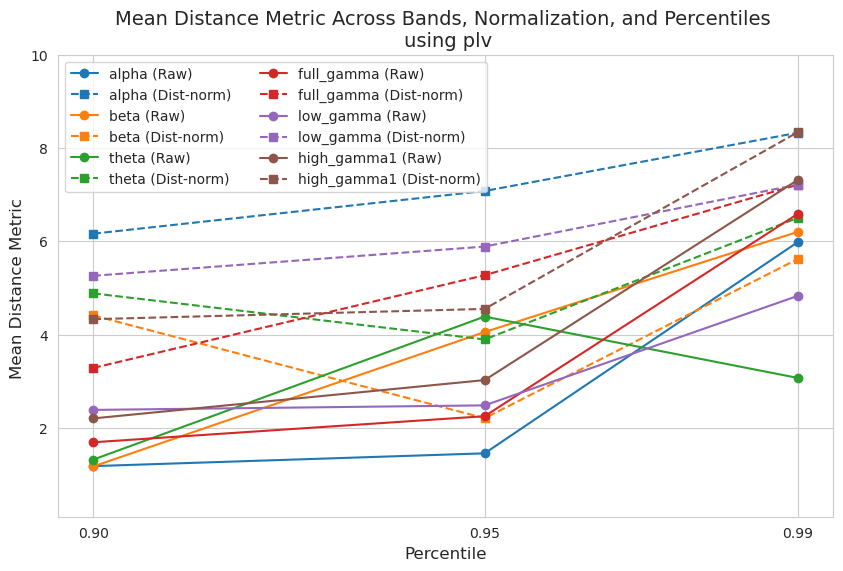

In [78]:
## Visualizing summary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame
df = summary_table

band_colors = {
    "alpha": "#1f77b4",  # Blue
    "beta": "#ff7f0e",   # Orange
    "theta": "#2ca02c",  # Green
    "full_gamma": "#d62728",  # Red
    "low_gamma": "#9467bd",  # Purple
    "high_gamma1": "#8c564b"  # Brown
}

# Plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot each band with unique colors and different line styles
for band in df["Band"].unique():
    df_band = df[df["Band"] == band]
    color = band_colors[band]  # Assign unique color
    
    # Raw Normalization (Solid Line)
    df_raw = df_band[df_band["Normalization"] == "Raw"]
    plt.plot(df_raw["Percentile"], df_raw["Mean AUC"], marker="o", linestyle="-", color=color, label=f"{band} (Raw)")
    
    # Distance-normalized (Dashed Line)
    df_dist = df_band[df_band["Normalization"] == "Distance-normalized"]
    plt.plot(df_dist["Percentile"], df_dist["Mean AUC"], marker="s", linestyle="--", color=color, label=f"{band} (Dist-norm)")

# Labels and legend
plt.xlabel("Percentile", fontsize=12)
plt.ylabel("Mean Distance Metric ", fontsize=12)
plt.title(f"Mean Distance Metric Across Bands, Normalization, and Percentiles \n using {method_exp}", fontsize=14)
plt.xticks([0.9, 0.95, 0.99])
plt.legend(loc="best", fontsize=10, ncol=2)  # Adjust to fit legend better
plt.ylim(0.1, 10)  # Adjust y-axis for better readability
plt.show()

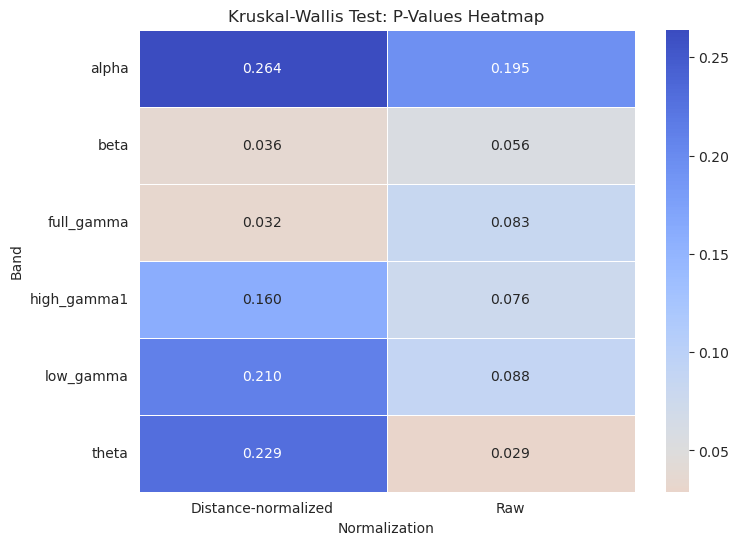

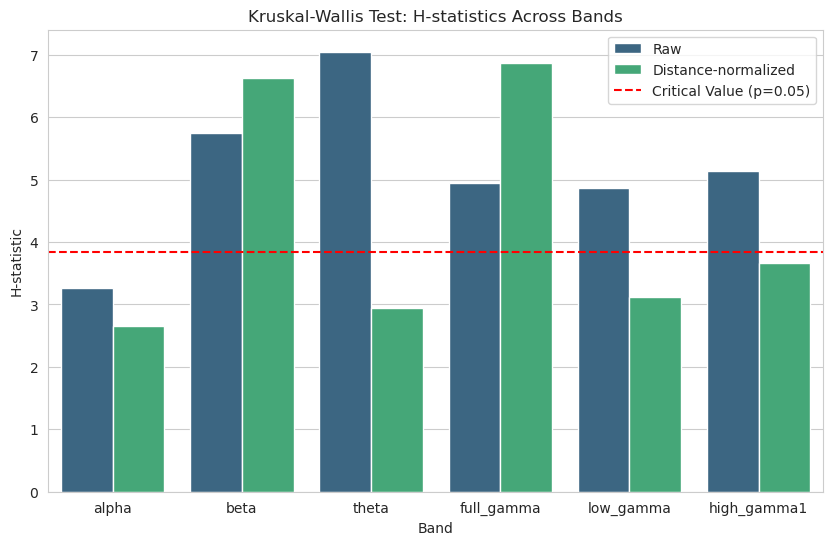

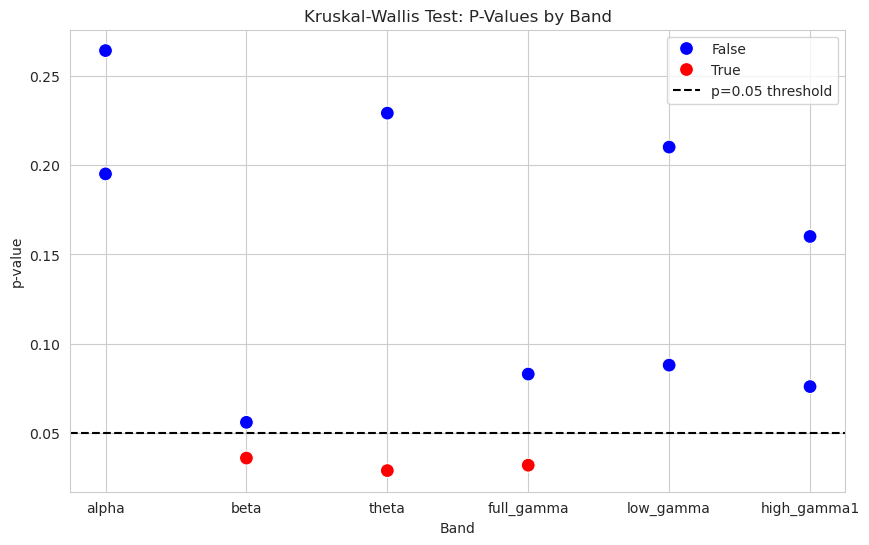

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample Data: Replace this with your actual KW test results
data = {
    "Band": ["alpha", "alpha", "beta", "beta", "theta", "theta", "full_gamma", "full_gamma", "low_gamma", "low_gamma", "high_gamma1", "high_gamma1"],
    "Normalization": ["Raw", "Distance-normalized"] * 6,
    "Comparison": ["Percentiles"] * 12,
    "H-statistic": [3.26, 2.66, 5.74, 6.62, 7.05, 2.94, 4.95, 6.86, 4.86, 3.12, 5.14, 3.66],
    "p-value": [0.195, 0.264, 0.056, 0.036, 0.029, 0.229, 0.083, 0.032, 0.088, 0.210, 0.076, 0.160],
}

df = pd.DataFrame(data)
df["Significant"] = df["p-value"] < 0.05  # Boolean column for significance

# --- Heatmap of p-values ---
plt.figure(figsize=(8, 6))
pivot_table = df.pivot(index="Band", columns="Normalization", values="p-value")
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="coolwarm_r", linewidths=0.5, center=0.05)
plt.title("Kruskal-Wallis Test: P-Values Heatmap")
plt.show()

# --- Bar Plot for H-statistics ---
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Band", y="H-statistic", hue="Normalization", palette="viridis")
plt.axhline(y=3.84, linestyle="--", color="red", label="Critical Value (p=0.05)")
plt.legend()
plt.title("Kruskal-Wallis Test: H-statistics Across Bands")
plt.show()

# --- Scatter Plot for Significance ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Band", y="p-value", hue="Significant", palette={True: "red", False: "blue"}, s=100)
plt.axhline(y=0.05, linestyle="--", color="black", label="p=0.05 threshold")
plt.legend()
plt.title("Kruskal-Wallis Test: P-Values by Band")
plt.show()


### Across groups (based on SOZ)

In [135]:
#Zone
# patient_sets = {
#     "FRONTAL": ['sub-HUP180','sub-HUP172','sub-HUP171'],
#     "INSULAR": ['sub-HUP150'],
#     "MFL": ['sub-HUP130','sub-HUP151'],
#     "MTL":  ['sub-HUP185', 'sub-HUP141', 'sub-HUP164', 'sub-HUP142', 'sub-HUP187'],
#     "PARIETAL": ['sub-HUP139'],
#     "TEMPORAL": ['sub-HUP146','sub-HUP177','sub-HUP173','sub-HUP160','sub-HUP148','sub-HUP144','sub-HUP117']
# }

#Lession type
patient_sets = {
    "NON-LESSIONAL": ['sub-HUP146','sub-HUP177','sub-HUP160','sub-HUP130','sub-HUP141','sub-HUP172','sub-HUP151','sub-HUP171','sub-HUP187'],
    "LESSIONAL": ['sub-HUP139','sub-HUP180','sub-HUP185','sub-HUP148','sub-HUP150','sub-HUP144','sub-HUP164','sub-HUP142','sub-HUP173','sub-HUP117']
}

In [137]:
# Initialize a list to store the results
results = []

# Loop over each combination of band, normalization, and percentile
for band in bands:
    for norm in  ["", "distance_"]:  # Raw and Distance-normalized
        for percentile in percentiles:
            data = []
            labels = []
            
            # Loop over patient sets
            for set_name, patients in patient_sets.items():
                # Collect the AUC values for the current set and combination of band, normalization, percentile
                auc_values = df.loc[(patients, percentile, norm), band].values.flatten()
                auc_values = auc_values[~pd.isna(auc_values)]  # Remove NaN values
                
                # Add the values to the list for the current set
                if len(auc_values) > 1:  # Only consider sets with more than 1 value
                    data.append(auc_values)
                    labels.append(set_name)
            
            # Perform the Kruskal-Wallis test if there are multiple sets to compare
            if len(data) > 1:
                h_stat, p_value = kruskal(*data)
                results.append({
                    "Band": band,
                    "Normalization": "Raw" if norm == "" else "Distance-normalized",
                    "Percentile": percentile,
                    "Comparison": "Sets",
                    "H-statistic": h_stat,
                    "p-value": p_value,
                })

# Convert to DataFrame for better readability
summary_df = pd.DataFrame(results)
summary_df["Significant"] = summary_df["p-value"] < 0.05
summary_df.to_clipboard(index=False, sep="\t")

In [136]:
# Initialize a list to store the results
summary_results = []

# Loop over each combination of band, normalization, and percentile
for band in bands:
    for norm in ["", "distance_"]:  # Raw and Distance-normalized
        for percentile in percentiles:
            data = []
            
            # Loop over patient sets
            for set_name, patients in patient_sets.items():
                # Collect the AUC values for the current set and combination of band, normalization, percentile
                auc_values = df.loc[(patients, percentile, norm), band].values.flatten()
                auc_values = auc_values[~pd.isna(auc_values)]  # Remove NaN values
                
                # If we have data for this set, compute the statistics
                if len(auc_values) > 1:  # Only consider sets with more than 1 value
                    mean_auc = np.mean(auc_values)
                    median_auc = np.median(auc_values)
                    std_auc = np.std(auc_values)
                    iqr_auc = np.percentile(auc_values, 75) - np.percentile(auc_values, 25)
                    
                    summary_results.append({
                        "Band": band,
                        "Normalization": "Raw" if norm == "" else "Distance-normalized",
                        "Percentile": percentile,
                        "Set": set_name,
                        "Mean AUC": mean_auc,
                        "Median AUC": median_auc,
                        "STD AUC": std_auc,
                        "IQR AUC": iqr_auc,
                    })

# Convert the results to a DataFrame for easy reading
summary_df = pd.DataFrame(summary_results)
summary_df.to_clipboard(index=False, sep="\t")  

#### Mann-Whitney test

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

results = []

patients = [
'sub-HUP141'
]

# Loop through each patient
for patient in patients:
    doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
    raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
    xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
    events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
    channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
    raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)

    for band in bands:
        for p in percentiles:
            for n in norm:
                try:
                    # Load the density data
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}.csv")
                    probs = pd.read_csv(probs_path)
                    probs.columns = ['Contact', 'Normalized density']
                    # Separate contacts into SOZ and non-SOZ
                    probs['Group'] = probs['Contact'].apply(lambda x: 'SOZ' if x in inside_network else 'Non-SOZ')
                    
                    # Calculate probabilities for both groups
                    soz_probs = probs[probs['Group'] == 'SOZ']['Normalized density']
                    non_soz_probs = probs[probs['Group'] == 'Non-SOZ']['Normalized density']
                    
                    # Perform Mann-Whitney U test
                    stat, p_value = mannwhitneyu(soz_probs, non_soz_probs, alternative='two-sided')
                    
                    # Save results
                    results.append({
                        'Patient': patient,
                        'Band': band,
                        'Norm': n,
                        'Percentile': p,
                        'Mann-Whitney U': stat,
                        'p-value': p_value,
                        'SOZ Mean Density': soz_probs.mean(),
                        'Non-SOZ Mean Density': non_soz_probs.mean()
                    })
                    
                    # Visualize the distributions
                    plt.figure(figsize=(8, 5))
                    sns.histplot(soz_probs, kde=True, color='blue', label='SOZ', stat="density", bins=10)
                    sns.histplot(non_soz_probs, kde=True, color='orange', label='Non-SOZ', stat="density", bins=10)
                    plt.title(f"{patient} - {band} - p-value: {p_value:.3e}", fontsize=14)
                    plt.xlabel("Normalized Density", fontsize=12)
                    plt.ylabel("Density", fontsize=12)
                    plt.legend(title="Group", fontsize=12)
                    plt.tight_layout()
                    # plt.savefig(f"outputs/{patient}_{band}_{n}_percentile_{p}_density_plot.png")
                    plt.close()
                except FileNotFoundError:
                    print(f"File not found for {patient}, {band}, {n}, percentile {p}.")
                except Exception as e:
                    print(f"Error processing {patient}, {band}, {n}, percentile {p}: {e}")

# Convert results into a DataFrame for review
results_df = pd.DataFrame(results)

# Save results to a CSV file
results_df.to_csv(f"{output_path}/soz_vs_non_soz_analysis.csv", index=False)


### ROC CURVE

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Dictionary to store ROC curve data
roc_curve_data = {}

# Process each patient
for patient in patients:
    # doc_file_data = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv', sep='\t')
    # raw = mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data], preload=True)
    # xyz_loc = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv', sep='\t')
    # events = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_events.tsv'), sep='\t')
    # channels = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_channels.tsv'), sep='\t')
    # raw, xyz_loc, inside_network = format_data_database(raw, xyz_loc, events=events, channels=channels)


    # #Define input paths
    main_path='/home/pablo/works/dev_thesis_SEEG/data/TVB_patients'
    # Document with file data
    raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)
    xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'xyz_loc.csv',sep=',')
    raw, xyz_loc, inside_network= format_data(raw, xyz_loc, events=None, channels=None)
    
    for percentile in percentiles:
        for n in norm:
            for band in bands:
                try:
                    # Load density probabilities
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}_{method_exp}.csv"
                    )
                    probs = pd.read_csv(probs_path)
                    
                    # Prepare for AUC calculation
                    normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                    y_true = np.array([1 if contact in inside_network else 0 for contact in normalized_densities.keys()])
                    y_scores = np.array([score for score in normalized_densities.values()])

                    # Calculate ROC curve and AUC
                    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
                    auc_score = auc(fpr, tpr)

                    # Store ROC curve data
                    roc_curve_data[(patient, percentile, n, band)] = {
                        "fpr": fpr,
                        "tpr": tpr,
                        "auc": auc_score
                    }
                except Exception as e:
                    print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                    roc_curve_data[(patient, percentile, n, band)] = None

# Save ROC curve data for later analysis
import pickle
with open(f"{output_path}/roc_curve_data.pkl", "wb") as f:
    pickle.dump(roc_curve_data, f)
print("ROC curve data saved.")


In [ ]:
# Load ROC curve data
with open(f"{output_path}/roc_curve_data.pkl", "rb") as f:
    roc_curve_data = pickle.load(f)

# Select configuration for plotting
selected_band = "low_gamma"
selected_norm = ""
selected_percentile = 0.9

plt.figure(figsize=(10, 8))
for patient in patients:
    config_key = (patient, selected_percentile, selected_norm, selected_band)
    if config_key in roc_curve_data and roc_curve_data[config_key]:
        fpr = roc_curve_data[config_key]["fpr"]
        tpr = roc_curve_data[config_key]["tpr"]
        auc_score = roc_curve_data[config_key]["auc"]
        
        plt.plot(fpr, tpr, label=f"{patient} (AUC = {auc_score:.2f})")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guessing')

# Customize the plot
plt.title(f"ROC Curves for Band: {selected_band}, Norm: {selected_norm}, Percentile: {selected_percentile}", fontsize=14)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

# Define a function to interpolate TPR for a common FPR range
def interpolate_roc_data(roc_curve_data, selected_band, selected_norm, selected_percentile):
    common_fpr = np.linspace(0, 1, 100)  # Common range for FPR
    tpr_values = []  # To store interpolated TPRs for each patient
    
    for patient in patients:
        config_key = (patient, selected_percentile, selected_norm, selected_band)
        if config_key in roc_curve_data and roc_curve_data[config_key]:
            fpr = roc_curve_data[config_key]["fpr"]
            tpr = roc_curve_data[config_key]["tpr"]
            # Interpolate TPR values for the common FPR range
            tpr_interp = np.interp(common_fpr, fpr, tpr)
            tpr_values.append(tpr_interp)
    
    return common_fpr, np.array(tpr_values)

# Load ROC curve data
with open(f"{output_path}/roc_curve_data.pkl", "rb") as f:
    roc_curve_data = pickle.load(f)

# Select configuration for plotting
selected_band = "full_gamma"
selected_norm = ""
selected_percentile = 0.9

# Interpolate TPR data
common_fpr, tpr_values = interpolate_roc_data(roc_curve_data, selected_band, selected_norm, selected_percentile)

# Calculate mean TPR and confidence intervals
mean_tpr = np.mean(tpr_values, axis=0)
std_error = sem(tpr_values, axis=0)  # Standard error of the mean
lower_ci = mean_tpr - 1.96 * std_error  # 95% confidence interval lower bound
upper_ci = mean_tpr + 1.96 * std_error  # 95% confidence interval upper bound

# Plot individual ROC curves
plt.figure(figsize=(12, 8))
for patient_idx, patient in enumerate(patients):
    config_key = (patient, selected_percentile, selected_norm, selected_band)
    if config_key in roc_curve_data and roc_curve_data[config_key]:
        fpr = roc_curve_data[config_key]["fpr"]
        tpr = roc_curve_data[config_key]["tpr"]
        auc_score = roc_curve_data[config_key]["auc"]
        plt.plot(fpr, tpr, alpha=0.5, label=f"{patient} (AUC = {auc_score:.2f})")

# Plot mean ROC curve
plt.plot(common_fpr, mean_tpr, color='blue', label="Mean ROC", linewidth=2)

# Plot confidence intervals
plt.fill_between(common_fpr, lower_ci, upper_ci, color='blue', alpha=0.2, label="95% CI")

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='grey', linestyle='--', label='Random Guessing')

# Customize the plot
plt.title(f"Mean ROC Curve with 95% CI\nBand: {selected_band}, Norm: {selected_norm}, Percentile: {selected_percentile}, Method: {method_exp}  \nUsing max ensemble", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


#### New metric

#### This metric will measure the absolute error of the method according to the coordinates set. 
1. Get the distance matrix
2. Get the electrodes above a threshold T
3. For every electrode above the threshold T, we select the minimal distance of (lets say a) to the electrodes in the soz. 
    If a belongs to the soz, the minimal distance will be 0. If not, but it is closer, distance is going to be a low number. If the algorithm made a huge mistake, distance is going to be so high. 
4. Every iteration add the minimal distance to a error E. 

When the algorithms works properly, error e is close to 0.

In [18]:
  #Normalize between 0 and 1
def normalize_matrix(matrix):
    min_value = np.min(matrix)
    max_value = np.max(matrix)
    normalized_matrix = (matrix - min_value) / (max_value - min_value)
    return normalized_matrix


In [ ]:
axises=['r', 'a', 's']
# patients = ['sub-HUP185']
# percentiles=[0.99]
# ref_data=0
# bands = ['beta']
# norm = ['distance_']
# Define a MultiIndex for patients, percentiles, and norm
index = pd.MultiIndex.from_product(
    [patients, percentiles, norm],
    names=["Patient", "Percentile", "Normalization"]
)
columns = bands
results_df = pd.DataFrame(index=index, columns=columns)
T=0.5

# Process each patient
for patient in patients:
    # REAL DATA
    # doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
    # raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
    # xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
    # events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
    # channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
    # raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)



    # SIMULATED DATA
    raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)
    xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'xyz_loc.csv',sep=',')
    raw, xyz_loc, inside_network= format_data(raw, xyz_loc, events=None, channels=None)

    #save the xyz_loc
    xyz_loc.to_csv(output_path + 'xyz_loc.csv', sep='\t', index=False)

    # Process each band, percentile, and normalization type
    for percentile in percentiles:
        for n in norm:
            for band in bands:
                try:
                    # Load density probabilities
                    probs_path = (
                        f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                        f"normalized_densities_{band}_{n}_{method_exp}.csv"
                    )
                    probs = pd.read_csv(probs_path)

                    # Prepare for AUC calculation
                    normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                    # Get the electrodes wich normalized density is greater than T
                    normalized_densities_ = {k:v for k,v in normalized_densities.items() if v>T}
                    pred=list(normalized_densities_.keys())

                    # Get the distance matrix  #Get the euclidean distance between each pair of electrodes
                    distances = pairwise_distances(xyz_loc[axises])
                    # Normalize the distances
                    normalized_distances = normalize_matrix(distances)

                    #Indexes
                    index_pred=list(xyz_loc.where(xyz_loc['formatted_label'].isin(pred)).dropna().index)
                    index_inside_network = list(xyz_loc.where(xyz_loc['formatted_label'].isin(inside_network)).dropna().index)


                    #Submatrix of distances
                    sub_M=normalized_distances[index_pred][:,index_inside_network]
                    minimum_distances=np.min(sub_M,axis=1)

                    #Final score 
                    score=np.sum(minimum_distances)
                    results_df.loc[(patient, percentile, n), band] = score
                except Exception as e:
                    print()
                    print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                    results_df.loc[(patient, percentile, n), band] = None

# Save results to CSV
results_df.to_csv(f"{output_path}/min_dist_scores_summary_{method_exp}T{T}.csv")
print("AUC scores saved to", f"{output_path}/min_dist_scores_summary_{method_exp}{T}.csv")

# # Display DataFrame
print(results_df)

#### soz vs non-soz BOXPLOT

In [ ]:
soz_densities =[]
non_soz_densities = []

# Process each patient
for patient in patients:
    doc_file_data = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv', sep='\t')
    raw = mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data], preload=True)
    xyz_loc = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv', sep='\t')
    events = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_events.tsv'), sep='\t')
    channels = pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf', '_channels.tsv'), sep='\t')
    raw, xyz_loc, inside_network = format_data_database(raw, xyz_loc, events=events, channels=channels)


    
    try:
        # Load density probabilities
        probs_path = (
            f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
            f"normalized_densities_{band}_{n}.csv"
        )
        probs = pd.read_csv(probs_path)
        
        # Prepare for AUC calculation        
        normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()

        # Separate contacts into SOZ and non-SOZ accordint to inside_network
        soz_densities.extend([normalized_densities[contact] for contact in inside_network])
        non_soz_densities.extend([normalized_densities[contact] for contact in normalized_densities if contact not in inside_network])
    
    except Exception as e:
        print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
        roc_curve_data[(patient, percentile, n, band)] = None

In [ ]:

plt.figure(figsize=(8, 5))
plt.boxplot([soz_densities, non_soz_densities], labels=['SOZ', 'Non-SOZ'])
plt.title(f"Boxplot of Normalized Densities\nBand: {band}, Norm: {norm}, Percentile: {percentile}", fontsize=14)
plt.ylabel("Normalized Density", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
#Compare histogram distribution of SOZ and non-SOZ using sns 
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(soz_densities, kde=True, color='blue', label='SOZ', stat="density", bins=10)
sns.histplot(non_soz_densities, kde=True, color='orange', label='Non-SOZ', stat="density", bins=10)
plt.title(f"Histogram of Normalized Densities\nBand: {band}, Norm: {n}, Percentile: {percentile}", fontsize=14)
plt.xlabel("Normalized Density", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Group", fontsize=12)
plt.tight_layout()
plt.show()

#### Final set of metrics- Box plot comparison across time-frmaes

In [ ]:
# patients = [
# 'sub-HUP139',
# 'sub-HUP180',
# 'sub-HUP146',
# 'sub-HUP177',
# 'sub-HUP185',
# 'sub-HUP117',
# 'sub-HUP173',
# 'sub-HUP160',
# 'sub-HUP148',
# 'sub-HUP150',
# 'sub-HUP130',
# 'sub-HUP141',
# 'sub-HUP144',
# 'sub-HUP164',
# 'sub-HUP142',
# 'sub-HUP172',
# 'sub-HUP151',
# 'sub-HUP171',
# 'sub-HUP187',
# ]  #Patients to process
patients=['S1','S2','S3','S4','S5']
percentiles=[0.9,0.95,0.99]
ref_data='x1'
bands = ['alpha','beta','theta','full_gamma','low_gamma','high_gamma1']
method_exp = 'aec'
norm = ['','distance_']


# output_paths=[f"/home/pablo/works/dev_thesis_SEEG/outputs_t{x}/" for x in ['03', '06', '15', '30', '60']]
output_paths=[f"/home/pablo/works/dev_thesis_SEEG/outputs_simil/"]


# main_path='/home/pablo/works/dev_thesis_SEEG/data/mainDatabase_patients/'
main_path='/home/pablo/works/dev_thesis_SEEG/data/TVB_patients'




# Define a MultiIndex for patients, percentiles, and norm
index = pd.MultiIndex.from_product(
    [patients, percentiles, norm],
    names=["Patient", "Percentile", "Normalization"]
)
columns = bands
all_datasets = []
for output_path in output_paths:
    results_df = pd.DataFrame(index=index, columns=columns)
    # Process each patient
    for patient in patients:
        # doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
        # raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
        # xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
        # events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
        # channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
        # raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)


        # Define input paths
        main_path='/home/pablo/works/dev_thesis_SEEG/data/TVB_patients'
        # Document with file data
        raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)
        xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'xyz_loc.csv',sep=',')
        raw, xyz_loc, inside_network= format_data(raw, xyz_loc, events=None, channels=None)

        # #save the xyz_loc
        # xyz_loc.to_csv(output_path + 'xyz_loc.csv', sep='\t', index=False)

        # Process each band, percentile, and normalization type
        for percentile in percentiles:
            for n in norm:
                for band in bands:
                    try:
                        # Load density probabilities
                        probs_path = (
                            f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                            f"normalized_densities_maxmax_{band}_{n}_{method_exp}.csv"
                        )
                        probs = pd.read_csv(probs_path)

                        # Prepare for AUC calculation
                        normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                        y_true = np.array([1 if contact in inside_network else 0 for contact in normalized_densities.keys()])
                        y_scores = np.array([score for score in normalized_densities.values()])
                        

                        # Step 4: Calculate ROC curve and AUC
                        fpr, tpr, thresholds = roc_curve(y_true, y_scores)
                        auc_score = auc(fpr, tpr)
                        # Calculate AUC
                        # auc_score = roc_auc_score(y_true, y_scores)

                        # Store the AUC score
                        results_df.loc[(patient, percentile, n), band] = auc_score
                    except Exception as e:
                        print()
                        print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                        results_df.loc[(patient, percentile, n), band] = None
    all_datasets.append(results_df)   


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compare_datasets_box_violin_AUC(datasets, dataset_names, band, percentile, normalization):
    """
    Generates a combined plot with a boxplot and violin plot comparing a specific band, percentile, 
    and normalization across multiple datasets.
    
    Parameters:
        datasets (list of pd.DataFrame): List of DataFrames to compare.
        dataset_names (list of str): Names of datasets corresponding to the DataFrames.
        band (str): The band to analyze (e.g., 'alpha', 'beta').
        percentile (str): The percentile to filter (e.g., '0.90', '0.95', '0.99').
        normalization (str): The normalization to filter (e.g., 'distance_').
    
    Returns:
        None
    """
    # Collect data for the given parameters from each dataset
    data_to_plot = []
    labels = []
    for df, name in zip(datasets, dataset_names):
        try:
            # Extract relevant data
            filtered_data = df.loc[(slice(None), percentile, normalization), band]
            data_to_plot.extend(filtered_data.values)  # Add the data to the list
            labels.extend([name] * len(filtered_data))  # Add dataset name for each value
        except KeyError:
            print(f"Combination not found in dataset '{name}': Percentile={percentile}, Normalization={normalization}")
    
    # Create a DataFrame for seaborn plotting
    plot_df = pd.DataFrame({"Dataset": labels, "Values": data_to_plot})
    
    # Create the figure
    plt.figure(figsize=(14, 8))
    
    # Add violin plot
    sns.violinplot(
        x="Dataset", 
        y="Values", 
        data=plot_df, 
        palette="Set2", 
        scale="width", 
        inner=None,  # Remove the default inner boxplot
        alpha=0.7
    )
    
    # Add boxplot
    sns.boxplot(
        x="Dataset", 
        y="Values", 
        data=plot_df, 
        width=0.2,  # Make the boxplot narrower
        showcaps=True,
        boxprops={'facecolor': 'None', 'edgecolor': 'black'},
        whiskerprops={'color': 'black'},
        medianprops={'color': 'red'},
        showfliers=False  # Remove outliers from the boxplot (to reduce clutter)
    )
    
    # Add scatter points for individual data
    sns.stripplot(
        x="Dataset", 
        y="Values", 
        data=plot_df, 
        color="black", 
        alpha=0.6, 
        jitter=True, 
        size=3
    )
    
    # Add titles and labels
    plt.title(f"Comparison of {band} (Percentile={percentile}, Normalization={normalization}) Across Datasets", fontsize=16)
    plt.xlabel("Dataset (epoch size) (s)", fontsize=14)
    plt.ylabel("AUC Density Based", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Show the plot
    plt.tight_layout()
    plt.show()


compare_datasets_box_violin_AUC(all_datasets, ['03'], 'low_gamma', 0.9, '')

In [ ]:
# Define a MultiIndex for patients, percentiles, and norm
index = pd.MultiIndex.from_product(
    [patients, percentiles, norm],
    names=["Patient", "Percentile", "Normalization"]
)
columns = bands
all_datasets_dist = []
T=0.5

for output_path in output_paths:
    results_df = pd.DataFrame(index=index, columns=columns)
    # Process each patient
    for patient in patients:
        # REAL DATA
        doc_file_data=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+patient+'_ses-presurgery_scans.tsv',sep='\t')
        raw=mne.io.read_raw_edf(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data],preload=True)
        xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/ieeg/'+patient+'_ses-presurgery_acq-seeg_space-fsaverage_electrodes.tsv',sep='\t')
        events=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_events.tsv'),sep='\t')
        channels=pd.read_csv(main_path+'/'+patient+'/'+'ses-presurgery/'+doc_file_data['filename'][ref_data].replace('_ieeg.edf','_channels.tsv'),sep='\t')
        raw, xyz_loc, inside_network= format_data_database(raw, xyz_loc, events=events, channels=channels)



        # SIMULATED DATA
        # raw=mne.io.read_raw_fif(main_path+'/'+patient+'/'+f'{patient}_{ref_data}.fif',preload=True)
        # xyz_loc=pd.read_csv(main_path+'/'+patient+'/'+'xyz_loc.csv',sep=',')
        # raw, xyz_loc, inside_network= format_data(raw, xyz_loc, events=None, channels=None)

        #save the xyz_loc
        # xyz_loc.to_csv(output_path + 'xyz_loc.csv', sep='\t', index=False)
        axises=['r', 'a', 's']
        # Process each band, percentile, and normalization type
        for percentile in percentiles:
            for n in norm:
                for band in bands:
                    try:
                        # Load density probabilities
                        probs_path = (
                            f"{output_path}/{patient}/ref_{ref_data}/percentile_{percentile}/"
                            f"normalized_densities_maxmax_{band}_{n}_{method_exp}.csv"
                        )
                        probs = pd.read_csv(probs_path)

                        # Prepare for AUC calculation
                        normalized_densities = probs.set_index(probs.columns[0])['Normalized density'].to_dict()
                        # Get the electrodes wich normalized density is greater than T
                        normalized_densities_ = {k:v for k,v in normalized_densities.items() if v>T}
                        pred=list(normalized_densities_.keys())

                        # Get the distance matrix  #Get the euclidean distance between each pair of electrodes
                        distances = pairwise_distances(xyz_loc[axises])
                        # Normalize the distances
                        normalized_distances = normalize_matrix(distances)

                        #Indexes
                        index_pred=list(xyz_loc.where(xyz_loc['formatted_label'].isin(pred)).dropna().index)
                        index_inside_network = list(xyz_loc.where(xyz_loc['formatted_label'].isin(inside_network)).dropna().index)


                        #Submatrix of distances
                        sub_M=normalized_distances[index_pred][:,index_inside_network]
                        minimum_distances=np.min(sub_M,axis=1)

                        #Final score 
                        score=np.sum(minimum_distances)
                        results_df.loc[(patient, percentile, n), band] = score
                    except Exception as e:
                        print()
                        print(f"Error processing {patient}, band {band}, norm {n}, percentile {percentile}: {e}")
                        results_df.loc[(patient, percentile, n), band] = None

    all_datasets_dist.append(results_df)   


In [ ]:
def compare_datasets_boxplot_DIST(datasets, dataset_names, band, percentile, normalization,threshold):
    """
    Generates a boxplot comparing a specific band, percentile, and normalization across multiple datasets.

    Parameters:
        datasets (list of pd.DataFrame): List of DataFrames to compare.
        dataset_names (list of str): Names of datasets corresponding to the DataFrames.
        band (str): The band to analyze (e.g., 'alpha', 'beta').
        percentile (str): The percentile to filter (e.g., '0.90', '0.95', '0.99').
        normalization (str): The normalization to filter (e.g., 'distance_').

    Returns:
        None
    """
    # Collect data for the given parameters from each dataset
    data_to_plot = []
    labels = []
    for df, name in zip(datasets, dataset_names):
        try:
            # Extract relevant data
            filtered_data = df.loc[(slice(None), percentile, normalization), band]
            data_to_plot.extend(filtered_data.values)  # Add the data to the list
            labels.extend([name] * len(filtered_data))  # Add dataset name for each value
        except KeyError:
            print(f"Combination not found in dataset '{name}': Percentile={percentile}, Normalization={normalization}")
    
    # Create a DataFrame for seaborn plotting
    plot_df = pd.DataFrame({"Dataset": labels, "Values": data_to_plot})
    # Create the figure
    plt.figure(figsize=(14, 8))
    
    # Add violin plot
    sns.violinplot(
        x="Dataset", 
        y="Values", 
        data=plot_df, 
        palette="Set2", 
        scale="width", 
        inner=None,  # Remove the default inner boxplot
        alpha=0.7
    )
    
    # Add boxplot
    sns.boxplot(
        x="Dataset", 
        y="Values", 
        data=plot_df, 
        width=0.2,  # Make the boxplot narrower
        showcaps=True,
        boxprops={'facecolor': 'None', 'edgecolor': 'black'},
        whiskerprops={'color': 'black'},
        medianprops={'color': 'red'},
        showfliers=False  # Remove outliers from the boxplot (to reduce clutter)
    )
    
    # Add scatter points for individual data
    sns.stripplot(
        x="Dataset", 
        y="Values", 
        data=plot_df, 
        color="black", 
        alpha=0.6, 
        jitter=True, 
        size=3
    )
    
    # Add titles and labels
    plt.title(f"Comparison of {band} (Percentile={percentile}, Normalization={normalization}) Across Datasets for threshold {T}", fontsize=16)
    plt.xlabel("Dataset (epoch size) (s)", fontsize=14)
    plt.ylabel("Distance Metric", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 25)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

compare_datasets_boxplot_DIST(all_datasets_dist, ['03', '06', '15', '30', '60'], 'beta',0.9,'',T)